# Business Understanding

## Project Prompt

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Goal

Find the aircraft(s) with the lowest risk for the company to start its new endeavor

# Data Understanding

## Dataset Overview

Aircraft Make and Model: Information about the specific make and model of the aircraft involved in each incident.

Weather Conditions: Details on the weather conditions prevailing at the time of the accidents.

Country: The country where the aviation accident took place.

# Data Preparation

## Step 1: Load and Explore Dataset

In [503]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [504]:
df.shape

(88889, 31)

In [505]:
#Load and print head of Aviation Datasets ('AviationData.csv', 'USState_Codes.csv')

df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [506]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

There are several columns that have significant missing values: Latitude, Longitude, Airport.Code, Airport.Name, Aircraft.Category, FAR.Description, Schedule, Air.carrier, Broad.phase.of.flight

In [508]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Cleaning Data

In [509]:
#Identify missing values across dataframe columns 

df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [510]:
#Identify columns with more than 25% of missing data and add them to a list

(df['FAR.Description'].isna().sum()/len(df)) * 100

columns_to_drop=[]
for x in df:
    if (df[x].isna().sum() / len(df[x])) * 100 > 25:
        columns_to_drop.append(x)
print(columns_to_drop)
   

['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight']


In [511]:
#Drop columns from dataframe

df_new = df.drop(columns= columns_to_drop)
df_new.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [512]:
print(type(df_new))

<class 'pandas.core.frame.DataFrame'>


In [513]:
#Exploring unique column values

print('Investigation Type:',df['Investigation.Type'].unique())
print('Aircraft damage:',df['Aircraft.damage'].unique())
print('Engine Type:',df['Engine.Type'].unique())

Investigation Type: ['Accident' 'Incident']
Aircraft damage: ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
Engine Type: ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']


In [514]:
df_new['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [515]:
#Clean data amongst same make but different spelling 

df_new['Make'] = df_new['Make'].str.title()
df_new['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [516]:
#Clean values in Weather Condition column

df_new['Weather.Condition'] = df_new['Weather.Condition'].str.title()
df_new['Weather.Condition'].value_counts()

Weather.Condition
Vmc    77303
Imc     5976
Unk     1118
Name: count, dtype: int64

In [517]:
df_new['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [518]:
damage_count = df_new['Aircraft.damage'].value_counts()
damage_count

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

# Exploratory Data Analysis

In [1]:
fig, ax = plt.subplots(figsize= (6,6))

ax.bar(damage_count.index,damage_count.values)
ax.set_ylabel('# of incidents')
ax.set_xlabel('Severity of Damage')

NameError: name 'plt' is not defined

In [520]:
print(type(df_new))

<class 'pandas.core.frame.DataFrame'>


In [521]:
#Group model and aircraft damage data to create a bar chart of damage across models
damage_by_model = df_new.groupby(['Model','Aircraft.damage']).size().unstack(fill_value=0)
damage_by_model['Total']= damage_by_model.sum(axis=1)
damage_by_model_sorted = damage_by_model.sort_values(by='Total',ascending=False)
top_10_damage_by_model=damage_by_model_sorted.head(10)
top_10_damage_by_model=top_10_damage_by_model.drop(columns=['Total'])
top_10_damage_by_model

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Model,,,,
152,365,29,1958,2
172,207,9,1514,4
172N,236,7,910,0
PA-28-140,223,5,699,1
150,128,10,682,1
172M,146,11,638,2
172P,135,5,547,0
182,118,8,526,2
180,51,3,566,1


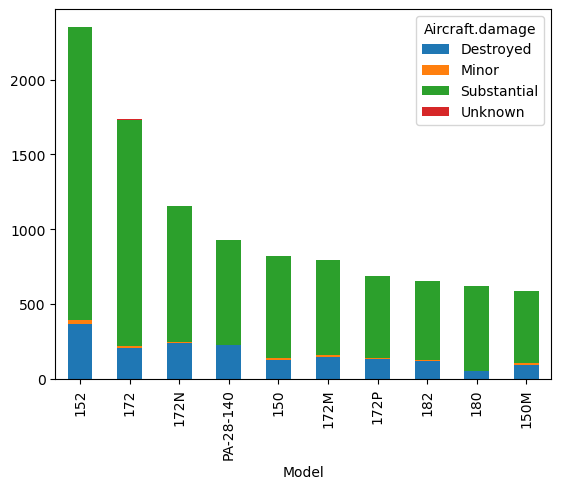

In [522]:
top_10_damage_by_model.plot(kind='bar',stacked=True)
plt.show()

In [523]:
#Group make and aircraft damage data to create a bar chart of damage across airplane makes
damage_by_make = df_new.groupby(['Make','Aircraft.damage']).size().unstack(fill_value=0)
damage_by_make['Total']= damage_by_make.sum(axis=1)
damage_by_make_sorted = damage_by_make.sort_values(by='Total',ascending=False)
top_10_damage_by_make = damage_by_make_sorted.head(10)
top_10_damage_by_make =top_10_damage_by_make.drop(columns=['Total'])
top_10_damage_by_make

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Make,,,,
Cessna,5202,387,21268,38
Piper,3428,204,11100,15
Beech,1585,170,3539,5
Bell,708,47,1900,5
Boeing,170,711,739,11
Mooney,373,24,923,3
Robinson,282,8,916,4
Grumman,299,18,845,0
Bellanca,233,7,800,0


In [524]:
# Convert values into percentages so you can compare damage in an apples to apples comparison

# Find the sum of the row
row_sums = top_10_damage_by_make.sum(axis=1)

# Divide each value by its row sum and multiply by 100
top_10_damage_by_make_percentage = top_10_damage_by_make.div(row_sums, axis=0) * 100

# Display the resulting DataFrame
print(top_10_damage_by_make_percentage)


Aircraft.damage  Destroyed      Minor  Substantial   Unknown
Make                                                        
Cessna           19.341885   1.438929    79.077896  0.141290
Piper            23.245406   1.383332    75.269546  0.101716
Beech            29.911304   3.208152    66.786186  0.094357
Bell             26.616541   1.766917    71.428571  0.187970
Boeing           10.423053  43.592888    45.309626  0.674433
Mooney           28.193500   1.814059    69.765684  0.226757
Robinson         23.305785   0.661157    75.702479  0.330579
Grumman          25.731497   1.549053    72.719449  0.000000
Bellanca         22.403846   0.673077    76.923077  0.000000
Hughes           20.697168   1.089325    78.213508  0.000000


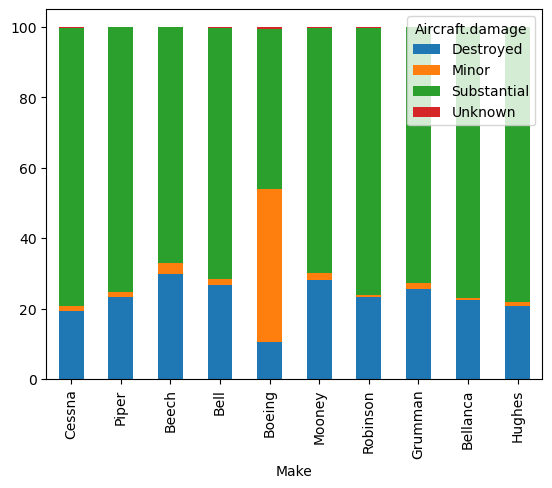

In [525]:
#Visulize the top 10 airplane makes by severity of damage

top_10_damage_by_make_percentage.plot(kind='bar',stacked=True)
plt.show()

Takaways from the above graph
- Beech has the highest % of destroyed aircrafts
- Cessna has the highest % of substantially damaged aircrafts
- Boeing seems to have the safest planes with the highest % of minor damage

In [526]:
df_new['Event.Date']

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

In [527]:
#Converting the event date column to a date dtype and extracting the year and month

df_new['Event.Date'] = pd.to_datetime(df['Event.Date'])
df_new['Year'] = df_new['Event.Date'].dt.year
df_new['Month'] = df_new['Event.Date'].dt.month

In [528]:
#drop values before 1982 since there is limited data

df_new = df_new[df_new['Year'] >=1982]
df_new['Year']

#Group by year and sum number of crashes 
yearly_crashes = df_new.groupby('Year').size()
yearly_crashes

Year
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

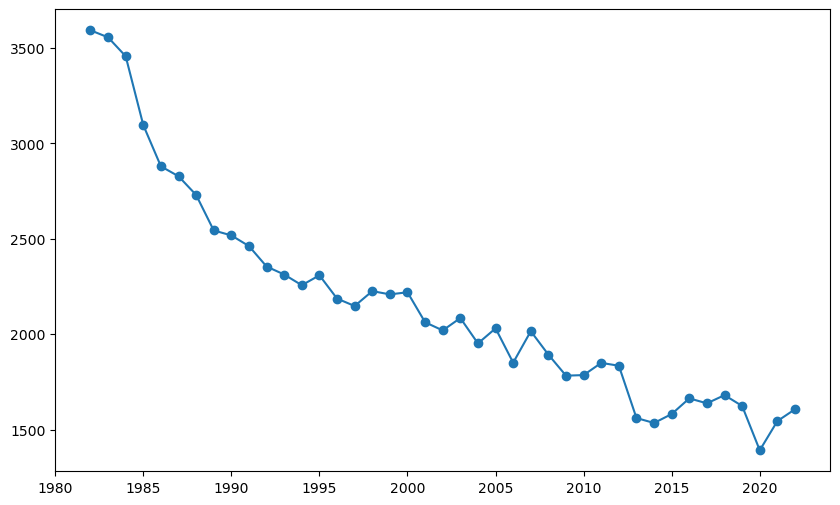

In [529]:
#crashes over the years

plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(yearly_crashes.index, yearly_crashes.values, marker='o')  # 'o' adds circle markers

In [530]:
df_new.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6083
Engine.Type                7095
Purpose.of.flight          6191
Total.Fatal.Injuries      11400
Total.Serious.Injuries    12508
Total.Minor.Injuries      11931
Total.Uninjured            5911
Weather.Condition          4492
Report.Status              6384
Publication.Date          13770
Year                          0
Month                         0
dtype: int64

In [531]:
#Exploring Weather Data 

weather_group = df_new['Weather.Condition'].value_counts()
print(weather_group.values)

[77301  5973  1116]


C:\Users\alecs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alecs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alecs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Weather.Condition'>

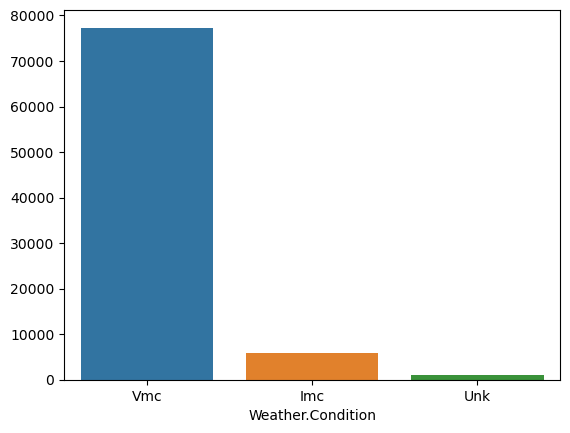

In [532]:
sns.barplot(x=weather_group.index, y=weather_group.values)


In [561]:
df_new['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      59675
1.0       8882
2.0       5171
3.0       1588
4.0       1101
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: count, Length: 125, dtype: int64

In [578]:
# Exploring crashes with serious / fatal injuries vs Total.Fatal.Injuries',
#'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured

injuries = df_new.groupby('Make')[['Total.Fatal.Injuries',
'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].count()

#identify top 10 makes by injuries
injuries['Total'] = injuries.sum(axis=1)
injuries_sorted = injuries.sort_values(by=['Total'],ascending=False)
injuries_sorted_top_10 = injuries_sorted.head(10)
injuries_sorted_top_10_final= injuries_sorted_top_10.drop(columns=['Total'])


injuries_sorted_top_10_final

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
Cessna,23809,23450,23725,25698
Piper,13194,12933,13004,14015
Beech,4795,4609,4620,4933
Bell,2352,2339,2360,2501
Boeing,2270,2313,2289,2581
Mooney,1157,1125,1147,1225
Grumman,1077,1073,1081,1128
Robinson,958,917,942,1083
Bellanca,924,919,936,988


In [582]:
# Convert values into percentages for an easy comparative visual

Total = injuries_sorted_top_10_final.sum(axis = 1)

injuries_percentage = injuries_sorted_top_10_final.div(Total,axis=0)
injuries_percentage

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
Cessna,0.246261,0.242548,0.245392,0.265799
Piper,0.248260,0.243349,0.244684,0.263708
Beech,0.252941,0.243129,0.243709,0.260220
Bell,0.246231,0.244870,0.247069,0.261830
Boeing,0.240135,0.244684,0.242145,0.273035
Mooney,0.248603,0.241728,0.246455,0.263214
Grumman,0.247075,0.246157,0.247993,0.258775
Robinson,0.245641,0.235128,0.241538,0.277692
Bellanca,0.245288,0.243961,0.248474,0.262278


<Axes: xlabel='Make'>

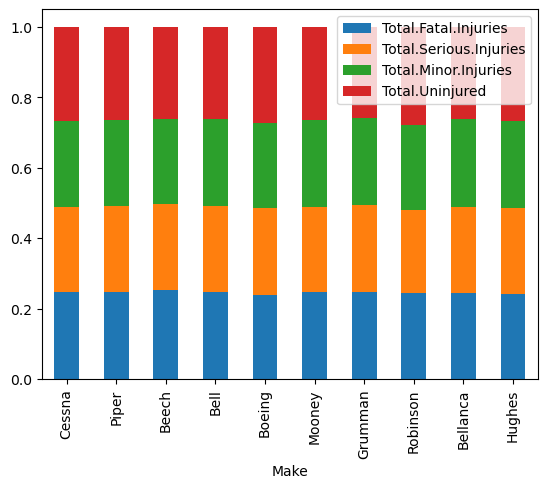

In [583]:
injuries_percentage.plot(kind='bar',stacked='True')

Graph Takeaways 
- There seems to be little difference in the % of injuries sustained across airplane makes

Let's identify if there are any noticeable differences between different makes of airplanes and the severity of injury